In [4]:
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
import numpy as np
from IPython.display import Audio

In [5]:
mywav = 'Desktop\\201800496_권은아.wav'
fs, d = wavfile.read(mywav)

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop\\201800496_권은아.wav'

In [ ]:
print(f"sampling rate: {fs} Hz")
print(f"shape of data: {d.shape}")

if len(d.shape)==2:
    mywav = d[:,0]
elif len(d.shape)==1:
    mywav = d

L = len(d)
print(f"duration of data: {L/fs} s")
print(f"samples of data: {L} samples")

In [ ]:
t = np.arange(0,len(mywav))/fs
plt.plot(t,mywav)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()

In [15]:
Audio(mywav,rate=fs)

In [16]:
t1 = np.arange(0,0.5,1/fs) # 1 second
W = signal.windows.tukey(len(t1),alpha = 1)
Z = np.zeros(np.shape(t1)) # no singal

In [50]:
E1 = np.sin(2*np.pi*329*t1)*W
A1 = np.sin(2*np.pi*440*t1)*W
B1 = np.sin(2*np.pi*494*t1)*W
C2 = np.sin(2*np.pi*523*t1)*W
D2 = np.sin(2*np.pi*587*t1)*W
E2 = np.sin(2*np.pi*659*t1)*W
F2 = np.sin(2*np.pi*698*t1)*W
G2 = np.sin(2*np.pi*784*t1)*W
A2 = np.sin(2*np.pi*880*t1)*W

In [51]:
mydata = np.concatenate([Z,0.3*E1, 0.3*A1, 0.3*C2, 1*E2, 0.5*E2, 0.3*D2, 0.3*C2, 0.3*B1, 1.5*C2, 1*C2, 0.3*A1, 0.3*C2, 0.3*E2, 2*A2, 1*A2, 0.5*A2, 0.25*G2, 0.25*F2, 1.5*G2, Z,Z])
t = np.linspace(0,len(mydata)/fs,len(mydata))

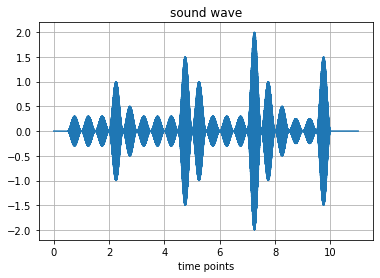

In [52]:
plt.plot(t,mydata)
plt.grid('on')
plt.title("sound wave")
plt.xlabel('time points')
plt.show()

In [53]:
Audio(mydata,rate=fs)

In [54]:
L_min = np.min((len(mydata),len(mywav)))
C = np.mean(np.abs(mywav))
print(L_min, C)

40000 1544.101325


In [62]:
sum_data = 0.90*(3*C*mydata[:L_min] + mywav[:L_min])

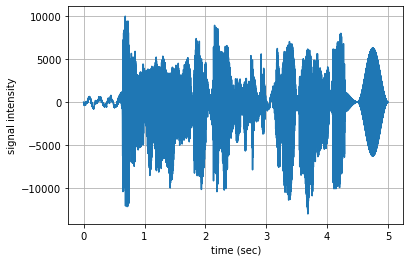

In [63]:
ts = np.arange(0,len(sum_data))/fs
plt.plot(ts,sum_data)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()

In [64]:
Audio(sum_data,rate=fs)

In [65]:
wavfile.write('mysum.wav',fs,sum_data/np.max(sum_data))